In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ds = pd.read_csv("loan-train.csv")
ds.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      609 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


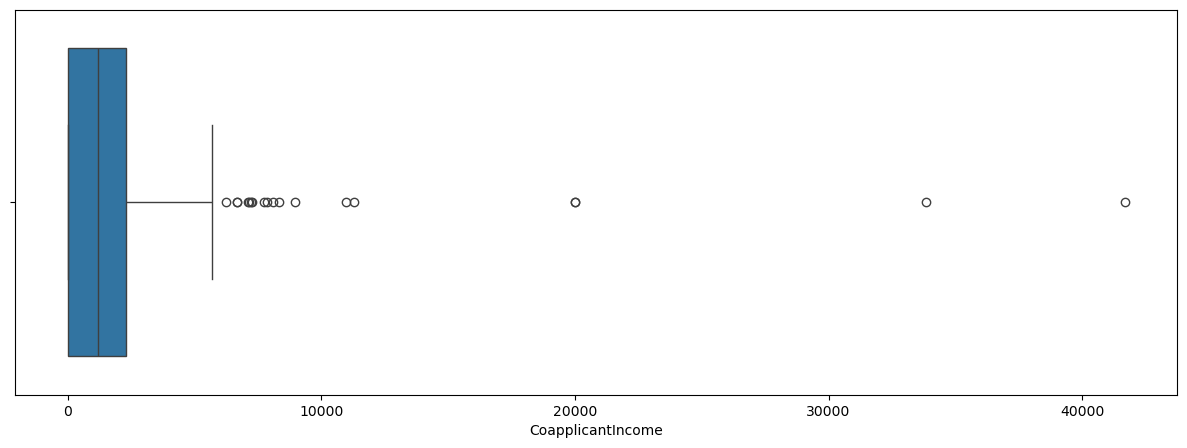

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome", data=ds)
plt.show()

In [ ]:
sns.displot(x="ApplicantIncome", data=ds, )
plt.show()

In [25]:
ds.shape

(614, 13)

## Using IQR removing Outlier 

In [33]:
q1 = ds["CoapplicantIncome"].quantile(0.25)
q3 = ds["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [35]:
IQR = q3 - q1

In [37]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
print(min_range, max_range)

-3445.875 5743.125


In [41]:
new_ds = ds[ds["CoapplicantIncome"] <= max_range]

In [43]:
new_ds.shape

(596, 13)

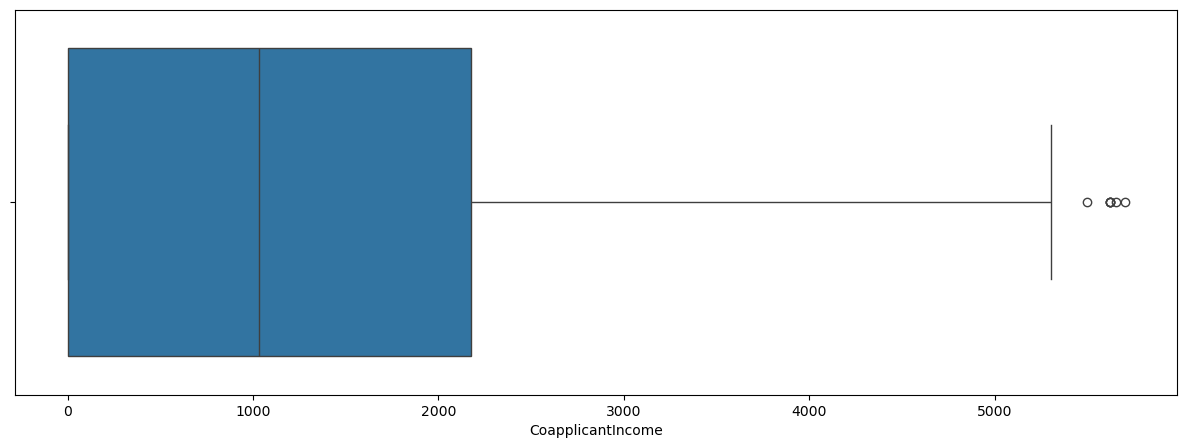

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome", data=new_ds)
plt.show()

## Removing outlier using Z-score

In [52]:
ds = pd.read_csv("loan-train.csv")
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         5
Loan_Status           0
dtype: int64

<Axes: ylabel='CoapplicantIncome'>

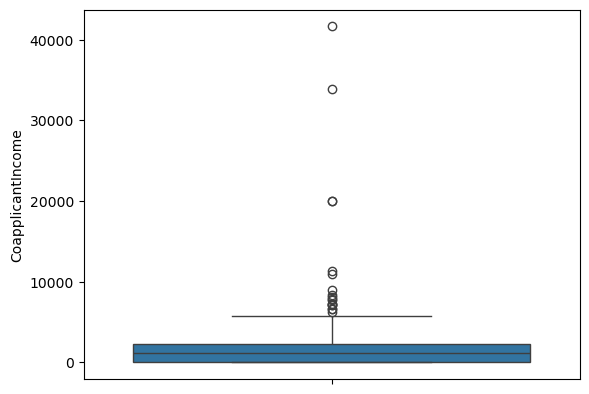

In [54]:
sns.boxplot(ds["CoapplicantIncome"])

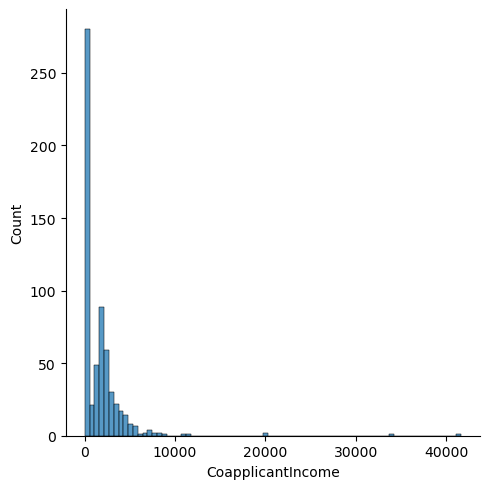

In [56]:
sns.displot(ds["CoapplicantIncome"])

In [58]:
min_range = ds["CoapplicantIncome"].mean() - (3*ds["CoapplicantIncome"].std())
max_range = ds["CoapplicantIncome"].mean() + (3*ds["CoapplicantIncome"].std())

In [60]:
min_range, max_range

(-7157.499309645475, 10399.990905699677)

In [62]:
new_ds=ds[ds["CoapplicantIncome"] <= max_range]

<Axes: ylabel='CoapplicantIncome'>

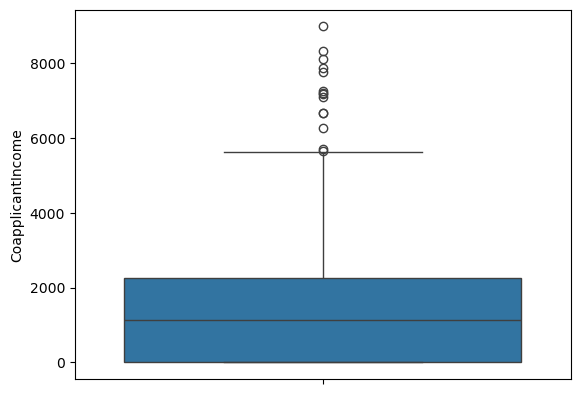

In [64]:
sns.boxplot(new_ds["CoapplicantIncome"])

In [76]:
new_ds.shape

(608, 13)

In [66]:
z_score = (ds["CoapplicantIncome"] - ds["CoapplicantIncome"].mean()) / ds["CoapplicantIncome"].std()

In [68]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [70]:
ds["z_score"] = z_score

In [72]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036


In [74]:
ds.shape

(614, 14)

In [80]:
ds[ds["z_score"]<3].shape

(608, 14)